# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

[What is tenths of degrees C and why?](https://earthscience.stackexchange.com/questions/5015/what-is-celsius-degrees-to-tenths)

[GHCN-Daily](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00861)

regarding the usage of tenths of a degree, it may be a continuation of an ancient data format from the early era of computers. Removing decimal points changes numbers to integers. In old computers memory capacity & calculating speed was an issue. In binary digits, integers are half the size of floating point numbers & a quarter the size of double precision numbers. Hence the use of integers speeds up calculations & requires less memory (disk drives, tape & RAM) than floating point numbers. In the old days, tape was used heavily as an external storage medium

There is logic in maintaining the old data format for consistency. If the data format was changed then all the old data would need to be changed & checked to ensure there were no errors. If the format was changed as of a certain date but the old data remained in the old format, people would need to be mindful of the change & when it occurred. Analysis apps would need to first check if the data was from before or after the date of change, condition the data accordingly before doing the calculations. It's easier to keep the old format

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd
import numpy as np

In [3]:
binsize = 400
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
df = pd.read_csv('./BinSize_d{}.csv'.format(binsize))
station_locations_by_hash = df[df['hash'] == hashid]
station_locations_by_hash.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
9994,USC00200032,41.9164,-84.0158,231.6,MI,ADRIAN 2 NNE,NaN,HCN,NaN,-6.951679e+06,4.660898e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10004,USC00200220,42.2875,-83.7611,263.7,MI,ANN ARBOR 1W,NaN,NaN,NaN,-6.890160e+06,4.702162e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10005,USC00200228,42.2417,-83.6933,253.6,MI,ANN ARBOR SE,NaN,NaN,NaN,-6.889586e+06,4.697069e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10006,USC00200230,42.2947,-83.7108,274.3,MI,ANN ARBOR U OF MICH,NaN,HCN,NaN,-6.885235e+06,4.702963e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
10023,USC00200842,41.8400,-83.8608,210.3,MI,BLISSFIELD 1NNE,NaN,NaN,NaN,-6.947155e+06,4.652402e+06,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...


In [50]:
station_locations_by_hash = df[df['hash'] == hashid]

lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

plt.figure()
plt.scatter(lons,lats,c='r')

KeyError: 'hash'

In [13]:
import folium

lon_mean = station_locations_by_hash['LONGITUDE'].mean()
lat_mean = station_locations_by_hash['LATITUDE'].mean()
centroid = [lat_mean,lon_mean]
m = folium.Map(location=centroid,zoom_start=11)
for lon,lat in zip(station_locations_by_hash['LONGITUDE'],station_locations_by_hash['LATITUDE']):
    folium.Marker([lat,lon]).add_to(m)
m

In [6]:
df = pd.read_csv('./{}.csv'.format(hashid))
df = df.rename(columns=dict(zip(df.columns,['ID','date','element','value'])))
df['value'] /= 10
leap_day = ['2008-02-29','2012-02-29']
df = df[(df['date']!='2008-02-29')&(df['date']!='2012-02-29')]
#In this assignment, I considered type of date column as object not datetime.
#However, It's better to change type of date column to datetime
df = df.sort_values('date',ascending=True)
df['month_day'] = list(map(lambda x:x[5:],df['date']))
df['year'] = list(map(lambda x:x[:4],df['date']))
df = df.reset_index(drop=True)
df_before_2015 = df[df['year']<'2015']
df_2015 = df[df['year']=='2015']
grouped = df_before_2015.groupby(['month_day','element']).agg({'value':['max','min']})['value'].unstack() #이거 생각해보니까 2015년도 포함함
day_minmax = pd.DataFrame({'max':grouped['max','TMAX'],'min':grouped['min','TMIN']},
                         index = grouped.index)
day_minmax['order'] = range(1,365+1)
grouped_2015 = df_2015.groupby(['month_day','element']).agg({'value':['max','min']})['value'].unstack()
day_minmax_2015 = pd.DataFrame({'max':grouped_2015['max','TMAX'],'min':grouped_2015['min','TMIN']},
                         index = grouped_2015.index)
day_minmax_2015['order'] = range(1,365+1)

In [7]:
day_minmax

,max,min,order
month_day,,,
01-01,15.6,-16.0,1
01-02,13.9,-26.7,2
01-03,13.3,-26.7,3
01-04,10.6,-26.1,4
01-05,12.8,-15.0,5
...,...,...,...
12-27,18.9,-13.8,361
12-28,19.4,-16.6,362
12-29,12.8,-15.0,363


In [8]:
lower = day_minmax_2015[day_minmax['min'] > day_minmax_2015['min']]
upper = day_minmax_2015[day_minmax['max'] < day_minmax_2015['max']]

lower.iloc[0,2]

5

<IPython.core.display.Javascript object>


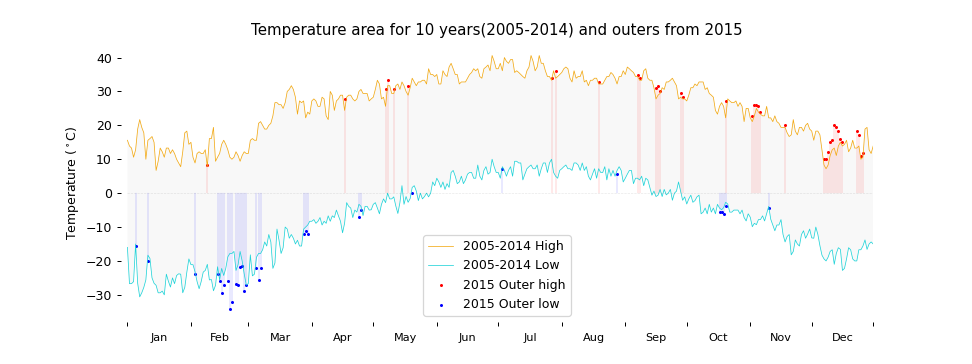

In [59]:
#plt.figure()
plt.figure(figsize=(12.0,4.5))
#plot lines, shade and points
plt.xlim([-2,365])
line_high = plt.plot(day_minmax['order'],day_minmax['max'],color='#F2A914',linewidth=0.10*6,
                     zorder=5,label='2005-2014 High')
line_low = plt.plot(day_minmax['order'],day_minmax['min'],color='#1FD3D8',linewidth=0.10*6,
                    zorder=5,label='2005-2014 Low')
plt.gca().fill_between(day_minmax['order'],
                      day_minmax['min'], day_minmax['max'],
                      facecolor='grey',
                      alpha=0.05)
outer_high = plt.scatter(upper['order'],upper['max'],c='r',s=2.0,label='2015 Outer high')
outer_low = plt.scatter(lower['order'],lower['min'],c='b',s=2.0,label='2015 Outer low')
#Set xticks and xlabels
tick_pos = [1,32,60,91,121,152,182,213,244,274,305,335,365]
month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(tick_pos,labels=['']*13)
for idx,month in enumerate(month_name):
    plt.text((tick_pos[idx]+tick_pos[idx+1])/2,-43.5,month,
             horizontalalignment='center',fontsize=9)
#Remove box
plt.box(False)
#timeline and density
plt.plot([1,365],[0,0],'--',color='black',linewidth=0.10*5,zorder=15,alpha=0.1)
for i in range(lower.shape[0]):
    order = lower.iloc[i,2]
    value = lower.iloc[i,1]
    plt.plot([order,order],[0,value],'-b',linewidth=0.10*2,alpha=0.7)
    
for i in range(upper.shape[0]):
    order = upper.iloc[i,2]
    value = upper.iloc[i,0]
    plt.plot([order,order],[0,value],'-r',linewidth=0.10*2,alpha=0.7)
    
#ylabel
plt.gca().tick_params(axis='y',left='off',pad=4.0,direction='out')
plt.ylabel('Temperature ($^\circ$C)',labelpad=4.0)
#title
plt.title('Temperature area for 10 years(2005-2014) and outers from 2015')
plt.legend()

In [60]:
plt.savefig('./assignment2Fig/7.png')

In [28]:
def rec_gc(art, depth=0):
    from matplotlib.artist import Artist
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
            
rec_gc(plt.gca().yaxis)

YAxis(121.27499678730963,39.89699894309043)
    Text(88.64999695287808, 0.5, 'Temperature ($^\\circ$C)')
    Text(0, 322.9259914453824, '')
        Line2D()
        Line2D()
        Line2D()
        Text(0, -40.0, '−40')
        Text(1, -40.0, '−40')
        Line2D((0,-30))
        Line2D()
        Line2D()
        Text(0, -30.0, '−30')
        Text(1, -30.0, '−30')
        Line2D((0,-20))
        Line2D()
        Line2D()
        Text(0, -20.0, '−20')
        Text(1, -20.0, '−20')
        Line2D((0,-10))
        Line2D()
        Line2D()
        Text(0, -10.0, '−10')
        Text(1, -10.0, '−10')
        Line2D((0,0))
        Line2D()
        Line2D()
        Text(0, 0.0, '0')
        Text(1, 0.0, '0')
        Line2D((0,10))
        Line2D()
        Line2D()
        Text(0, 10.0, '10')
        Text(1, 10.0, '10')
        Line2D((0,20))
        Line2D()
        Line2D()
        Text(0, 20.0, '20')
        Text(1, 20.0, '20')
        Line2D((0,30))
        Line2D()
        Line2D()
    

In [12]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

FileNotFoundError: [Errno 2] No such file or directory: 'data/C2A2_data/BinSize_d400.csv'